In [1]:
import torch
import matplotlib.pyplot as plt
from torch import nn
import numpy as np

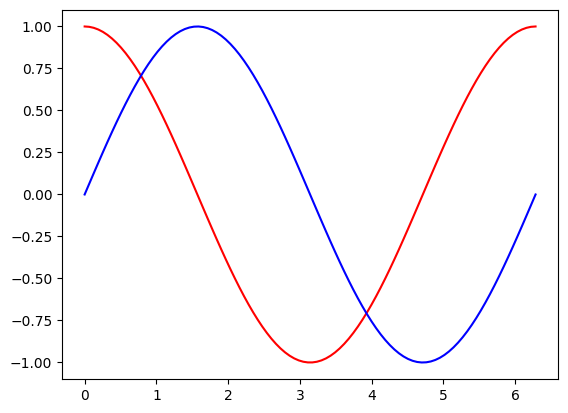

In [2]:
steps = np.linspace(0, np.pi*2, 100, dtype=np.float32)
x_np = np.sin(steps)
y_np = np.cos(steps)
plt.plot(steps, y_np, 'r-', label='target(cos)')
plt.plot(steps, x_np, 'b-', label='input(sin)')
plt.show()

In [9]:
INPUT_SIZE = 1
LR = 0.01

In [7]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(
            input_size = INPUT_SIZE,
            hidden_size = 32,
            num_layers = 1,
            batch_first = True
        )
        self.out = nn.Linear(32, 1)
    def forward(self, x, h_state):
        r_out, h_state = self.rnn(x, h_state)
        outs = []
        for time_step in range(r_out.size(1)):
            outs.append(self.out(r_out[:, time_step, :]))
        
        return torch.stacks(outs, dim=1), h_state

In [10]:
rnn = RNN()
print(rnn)
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)
loss_func = nn.MSELoss()
h_state = None

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (out): Linear(in_features=32, out_features=1, bias=True)
)


In [ ]:
for step in range(100):
    start, end = step * np.pi